# **Analyzing Financial Statements in Python**

## **The Income Statement**



In this chapter, you'll learn how to read and interpret an income statement, calculate key financial ratios, and even create your own functions in Python to automate repetitive tasks. You'll also gain experience using seaborn, a powerful data visualization library, to produce figures to help you understand a company's financial performance.

#### **Compute net income**


One of the uses of an income statement is to determine how much profit (also called net income) the company is making. In this exercise, you will compute the net income of a company.

In this exercise, total_revenue, depreciation, and cost_of_goods_sold have already been loaded for you. You will compute the income before taxes using these items. Then, assuming a tax rate of 5%, you will compute the net income, i.e., the income after taxes.

In [1]:
depreciation = 260
total_revenue = 3640
cost_of_goods_sold = 460

# Compute income before taxes
income_before_taxes = total_revenue - cost_of_goods_sold - depreciation

# Compute income before taxes
net_income = income_before_taxes * 0.95

print(net_income)

2774.0


#### **Computing ratios from the income statement**


The gross and operating margins are commonly used to see how efficiently a company uses its assets to earn money. In this exercise, you will compute the average gross margin and operating margin by industry.

The DataFrame income_statement has already been loaded for you, and pandas have also been loaded with the alias pd.

In [3]:
import pandas as pd
income_statement = pd.read_excel('financials.xlsx')

In [4]:
income_statement.head()

,Year,Cost Of Revenue,Discontinued Operations,Ebit,Effect Of Accounting Charges,Extraordinary Items,Gross Profit,Income Before Tax,Income Tax Expense,Interest Expense,...,Operating Income,Other Items,Other Operating Expenses,Research Development,Selling General Administrative,Total Operating Expenses,Total Other Income Expense Net,Total Revenue,comp_type,company
0,2019,161782000000,NaN,63930000000,NaN,NaN,98392000000,65737000000,10481000000,-3.576000e+09,...,63930000000,NaN,NaN,1.621700e+10,18245000000,196244000000,1807000000,260174000000,tech,AAPL
1,2020,169559000000,NaN,66288000000,NaN,NaN,104956000000,67091000000,9680000000,-2.873000e+09,...,66288000000,NaN,NaN,1.875200e+10,19916000000,208227000000,803000000,274515000000,tech,AAPL
2,2021,212981000000,NaN,108949000000,NaN,NaN,152836000000,109207000000,14527000000,-2.645000e+09,...,108949000000,NaN,NaN,2.191400e+10,21973000000,256868000000,258000000,365817000000,tech,AAPL
3,2022,223546000000,NaN,119437000000,NaN,NaN,170782000000,119103000000,19300000000,-2.931000e+09,...,119437000000,NaN,NaN,2.625100e+10,25094000000,274891000000,-334000000,394328000000,tech,AAPL
4,2019,42910000000,NaN,42959000000,NaN,NaN,82933000000,43688000000,4448000000,-2.686000e+09,...,42959000000,NaN,NaN,1.687600e+10,23098000000,82884000000,729000000,125843000000,tech,MSFT


In [5]:
# Compute the gross margin
income_statement["gross_margin"] = ( income_statement["Total Revenue"] - income_statement["Cost Of Revenue"] ) / income_statement["Total Revenue"]

# Compute the operating margin
income_statement["operating_margin"] = ( income_statement["Total Revenue"] - income_statement["Total Operating Expenses"] ) / income_statement["Total Revenue"]

# Calculate mean gross margin and operating margin by industry
average_ratio = income_statement.groupby("comp_type")[["gross_margin", "operating_margin"]].mean()

average_ratio

,gross_margin,operating_margin
comp_type,,
fmcg,0.514396,0.207112
real_est,0.534848,0.299938
tech,0.572062,0.273889


#### **Updating the user-defined function**


User-defined functions are a great way of reducing repetitive work. The function defined in the video is provided below:
```
def compute_ratio(df, numerator, denominator,
                  ratio_name):
    df[ratio_name] = df[numerator] / df[denominator]
    return df
  ```
Notice that the function we defined cannot directly compute ratios that require adding or subtracting values in the numerator and denominator, such as the operating or the gross margin ratio.

In this exercise, you will update this function so that it can be used to compute ratios that involve addition in the numerator and denominator.

You will use a pandas function called .sum(), which can sum over an axis in the DataFrame. An axis of 0 means rows, so it would sum up values over the rows and return one value for each column. An axis of 1 means columns, so it would sum up values from different columns in df and return one value for each row. You can think of df.sum(axis=1) as being equivalent to df[column_1] + ... + df[column_n]. The default axis in pd.sum() is 0.

In [7]:
balance_sheet = pd.read_excel('balance_sheet.xlsx')

In [8]:
balance_sheet.head()

,Year,Accounts Payable,Cash,Common Stock,Gains Losses Not Affecting Retained Earnings,Inventory,Long Term Debt,Long Term Investments,Net Receivables,Net Tangible Assets,...,Total Liab,Total Stockholder Equity,comp_type,company,Deferred Long Term Asset Charges,Good Will,Intangible Assets,Capital Surplus,Minority Interest,Deferred Long Term Liab
0,2019,46236000000,48844000000,4.517400e+10,-584000000,4.106000e+09,9.180700e+10,1.053410e+11,45804000000,90488000000,...,248028000000,90488000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,42296000000,38016000000,5.077900e+10,-406000000,4.061000e+09,9.866700e+10,1.008870e+11,37445000000,65339000000,...,258549000000,65339000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,54763000000,34940000000,5.736500e+10,163000000,6.580000e+09,1.091060e+11,1.278770e+11,51506000000,63090000000,...,287912000000,63090000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,64115000000,23646000000,6.484900e+10,-11109000000,4.946000e+09,9.895900e+10,1.208050e+11,60932000000,50672000000,...,302083000000,50672000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,9382000000,11356000000,7.852000e+10,-340000000,2.063000e+09,6.666200e+10,2.649000e+09,29524000000,52554000000,...,184226000000,102330000000,tech,MSFT,7.536000e+09,4.202600e+10,7.750000e+09,NaN,NaN,NaN


In [9]:
def compute_ratio(df, numerator, denominator, ratio_name):
    df[ratio_name] = df[numerator].sum(axis=1) / df[denominator].sum(axis=1)
    return df

print(balance_sheet.columns)

# Use compute_ratio to compute the current ratio
balance_sheet = compute_ratio(balance_sheet, ['Inventory', 'Short Term Investments'], ['Accounts Payable'], "current_ratio")

Index(['Year', 'Accounts Payable', 'Cash', 'Common Stock',
       'Gains Losses Not Affecting Retained Earnings', 'Inventory',
       'Long Term Debt', 'Long Term Investments', 'Net Receivables',
       'Net Tangible Assets', 'Other Assets', 'Other Current Assets',
       'Other Current Liab', 'Other Liab', 'Other Stockholder Equity',
       'Property Plant Equipment', 'Retained Earnings', 'Short Long Term Debt',
       'Short Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity',
       'comp_type', 'company', 'Deferred Long Term Asset Charges', 'Good Will',
       'Intangible Assets', 'Capital Surplus', 'Minority Interest',
       'Deferred Long Term Liab'],
      dtype='object')


In [11]:
balance_sheet.head()

,Year,Accounts Payable,Cash,Common Stock,Gains Losses Not Affecting Retained Earnings,Inventory,Long Term Debt,Long Term Investments,Net Receivables,Net Tangible Assets,...,Total Stockholder Equity,comp_type,company,Deferred Long Term Asset Charges,Good Will,Intangible Assets,Capital Surplus,Minority Interest,Deferred Long Term Liab,current_ratio
0,2019,46236000000,48844000000,4.517400e+10,-584000000,4.106000e+09,9.180700e+10,1.053410e+11,45804000000,90488000000,...,90488000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,1.207263
1,2020,42296000000,38016000000,5.077900e+10,-406000000,4.061000e+09,9.866700e+10,1.008870e+11,37445000000,65339000000,...,65339000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,1.347361
2,2021,54763000000,34940000000,5.736500e+10,163000000,6.580000e+09,1.091060e+11,1.278770e+11,51506000000,63090000000,...,63090000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,0.625952
3,2022,64115000000,23646000000,6.484900e+10,-11109000000,4.946000e+09,9.895900e+10,1.208050e+11,60932000000,50672000000,...,50672000000,tech,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,0.461733
4,2019,9382000000,11356000000,7.852000e+10,-340000000,2.063000e+09,6.666200e+10,2.649000e+09,29524000000,52554000000,...,102330000000,tech,MSFT,7.536000e+09,4.202600e+10,7.750000e+09,NaN,NaN,NaN,13.274249


#### **Updating user-defined function to do subtraction**


The function you worked on in the previous exercise cannot do subtraction. Have a look at this function:
```
def compute_ratio(df, numerator, denominator, ratio_name, 
                  addition_in_numerator = True,
                  addition_in_denominator = True):
  numerator_of_ratio = np.where(addition_in_numerator,
                             df[numerator].sum(axis=1), 
                             df[numerator[0]] - df[numerator[1:]].sum(
                               axis=1))
  denominator_of_ratio = np.where(addition_in_denominator, 
                               df[denominator].sum(axis=1), 
                               df[denominator[0]] - df[denominator[1:]].sum(axis=1))
  df[ratio_name] = numerator_of_ratio/denominator_of_ratio
  return df
```
This function can deal with addition and subtraction in numerators and denominators of financial ratios. Notice that the function uses np.where. This is a function from the package NumPy. np.where checks if the first argument is True; if so, it returns the second argument, else it returns the third. For example, in the above, we have:
```
np.where(addition_in_numerator,
                             df[numerator].sum(axis=1), 
                             df[numerator[0]] - df[numerator[1:]].sum(
                               axis=1))
```
If addition_in_numerator is true, np.where will return df[numerator].sum(axis=1), else it will return df[numerator[0]] - df[numerator[1:]].sum(axis=1).

In this exercise, the balance_sheet DataFrame, along with pandas and NumPy aspd and np, respectively, have been loaded for you. Use these to determine which of the following statements is correct.

**Answer:** The function substracts the sum of the rest of the columns named in the denominator and numerator from the first column.

#### **Computing ratios with user-defined function**


In this exercise, you'll use the function from the last exercise to compute financial ratios. Recall that the function is:
```
def compute_ratio(df, numerator, denominator, ratio_name, 
                  addition_in_numerator = True,
                  addition_in_denominator = True):
  numerator_of_ratio = np.where(addition_in_numerator,
                             df[numerator].sum(axis=1), 
                             df[numerator[0]] - df[numerator[1:]].sum(
                               axis=1))
  denominator_of_ratio = np.where(addition_in_denominator, 
                               df[denominator].sum(axis=1), 
                               df[denominator[0]] - df[denominator[1:]].sum(axis=1))
  df[ratio_name] = numerator_of_ratio/denominator_of_ratio
  return df
```
The pandas DataFrame merged_dat is loaded for you, which you will use to compute financial ratios using the function compute_ratio.

In [12]:
income_statements.columns

Index(['Year', 'Cost Of Revenue', 'Discontinued Operations', 'Ebit',
       'Effect Of Accounting Charges', 'Extraordinary Items', 'Gross Profit',
       'Income Before Tax', 'Income Tax Expense', 'Interest Expense',
       'Minority Interest', 'Net Income',
       'Net Income Applicable To Common Shares',
       'Net Income From Continuing Ops', 'Non Recurring', 'Operating Income',
       'Other Items', 'Other Operating Expenses', 'Research Development',
       'Selling General Administrative', 'Total Operating Expenses',
       'Total Other Income Expense Net', 'Total Revenue', 'comp_type',
       'company'],
      dtype='object')

In [14]:
balance_sheet.columns

Index(['Year', 'Accounts Payable', 'Cash', 'Common Stock',
       'Gains Losses Not Affecting Retained Earnings', 'Inventory',
       'Long Term Debt', 'Long Term Investments', 'Net Receivables',
       'Net Tangible Assets', 'Other Assets', 'Other Current Assets',
       'Other Current Liab', 'Other Liab', 'Other Stockholder Equity',
       'Property Plant Equipment', 'Retained Earnings', 'Short Long Term Debt',
       'Short Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity',
       'comp_type', 'company', 'Deferred Long Term Asset Charges', 'Good Will',
       'Intangible Assets', 'Capital Surplus', 'Minority Interest',
       'Deferred Long Term Liab', 'current_ratio'],
      dtype='object')

In [22]:
merged_dat = pd.merge(income_statement, balance_sheet, on=["Year", "company"])

In [23]:
def compute_ratio(df, numerator, denominator, ratio_name, 
                  addition_in_numerator = True,
                  addition_in_denominator = True):
  numerator_of_ratio = np.where(addition_in_numerator,
                             df[numerator].sum(axis=1), 
                             df[numerator[0]] - df[numerator[1:]].sum(
                               axis=1))
  denominator_of_ratio = np.where(addition_in_denominator, 
                               df[denominator].sum(axis=1), 
                               df[denominator[0]] - df[denominator[1:]].sum(axis=1))
  df[ratio_name] = numerator_of_ratio/denominator_of_ratio
  return df

In [24]:
import numpy as np
print(merged_dat.columns)

# Compute gross margin using compute_ratio
merged_dat = compute_ratio(merged_dat, ["Total Revenue", "Cost Of Revenue"], ["Total Revenue"], ratio_name="gross_margin", addition_in_numerator = False)

# Compute asset turnover ratio using compute_ratio
merged_dat = compute_ratio(merged_dat, ["Total Revenue"], ["Total Assets"], ratio_name="asset_turnover", addition_in_numerator = True)

Index(['Year', 'Cost Of Revenue', 'Discontinued Operations', 'Ebit',
       'Effect Of Accounting Charges', 'Extraordinary Items', 'Gross Profit',
       'Income Before Tax', 'Income Tax Expense', 'Interest Expense',
       'Minority Interest_x', 'Net Income',
       'Net Income Applicable To Common Shares',
       'Net Income From Continuing Ops', 'Non Recurring', 'Operating Income',
       'Other Items', 'Other Operating Expenses', 'Research Development',
       'Selling General Administrative', 'Total Operating Expenses',
       'Total Other Income Expense Net', 'Total Revenue', 'comp_type_x',
       'company', 'gross_margin', 'operating_margin', 'Accounts Payable',
       'Cash', 'Common Stock', 'Gains Losses Not Affecting Retained Earnings',
       'Inventory', 'Long Term Debt', 'Long Term Investments',
       'Net Receivables', 'Net Tangible Assets', 'Other Assets',
       'Other Current Assets', 'Other Current Liab', 'Other Liab',
       'Other Stockholder Equity', 'Property Pla

In [30]:
print(merged_dat.columns)

Index(['Year', 'Cost Of Revenue', 'Discontinued Operations', 'Ebit',
       'Effect Of Accounting Charges', 'Extraordinary Items', 'Gross Profit',
       'Income Before Tax', 'Income Tax Expense', 'Interest Expense',
       'Minority Interest_x', 'Net Income',
       'Net Income Applicable To Common Shares',
       'Net Income From Continuing Ops', 'Non Recurring', 'Operating Income',
       'Other Items', 'Other Operating Expenses', 'Research Development',
       'Selling General Administrative', 'Total Operating Expenses',
       'Total Other Income Expense Net', 'Total Revenue', 'comp_type_x',
       'company', 'gross_margin', 'operating_margin', 'Accounts Payable',
       'Cash', 'Common Stock', 'Gains Losses Not Affecting Retained Earnings',
       'Inventory', 'Long Term Debt', 'Long Term Investments',
       'Net Receivables', 'Net Tangible Assets', 'Other Assets',
       'Other Current Assets', 'Other Current Liab', 'Other Liab',
       'Other Stockholder Equity', 'Property Pla

In [34]:
merged_dat[['Year','company','gross_margin','asset_turnover']].head()

,Year,company,gross_margin,asset_turnover
0,2019,AAPL,0.378178,0.768572
1,2020,AAPL,0.382332,0.847562
2,2021,AAPL,0.417794,1.042208
3,2022,AAPL,0.433096,1.117852
4,2019,MSFT,0.659020,0.439157


#### **Computing multiple ratios with the user-defined function**


Let's have a look at the function you saw in the last two exercises.
```
def compute_ratio(df, numerator, denominator, ratio_name, 
                  addition_in_numerator = True,
                  addition_in_denominator = True):
  ratio_numerator = np.where(addition_in_numerator,
                             df[numerator].sum(axis=1), 
                             df[numerator[0]] - df[numerator[1:]].sum(
                               axis=1))
  ratio_denominator = np.where(addition_in_denominator, 
                               df[denominator].sum(axis=1), 
                               df[denominator[0]] - df[denominator[1:]].sum(axis=1))
  df[ratio_name] = ratio_numerator/ratio_denominator
  return df
  ```
Recall that in the previous exercise, we used the function to compute ratios. Still, it was not more efficient nor did it involve less coding to compute the ratios using this function. In this exercise, you'll see how the function can be used to compute many ratios in a loop. This will make computing multiple ratios more efficient and involve less coding.

In [35]:
# Print the columns 
print(merged_dat.columns)

list_of_ratio_names = ["asset_turnover", "gross_margin", "current_ratio"]

list_of_numerators = [["Total Revenue"],
  					  ["Total Revenue", "Cost Of Revenue"],
  					  ["Total Current Assets"]]
list_of_denominators = [["Total Assets"],
                      ["Total Revenue"],
                      ["Total Current Liabilities"]]

list_addition_in_numerator = [True, False, True]
list_addition_in_denominator = [True, True, True]

# Fill in the correct function here
for numerator, denominator, ratio_name, addition_in_numerator, addition_in_denominator in zip(list_of_numerators, list_of_denominators, list_of_ratio_names, list_addition_in_numerator, list_addition_in_denominator):
  
  merged_dat = compute_ratio(merged_dat, numerator, denominator, ratio_name, addition_in_numerator, addition_in_denominator)

Index(['Year', 'Cost Of Revenue', 'Discontinued Operations', 'Ebit',
       'Effect Of Accounting Charges', 'Extraordinary Items', 'Gross Profit',
       'Income Before Tax', 'Income Tax Expense', 'Interest Expense',
       'Minority Interest_x', 'Net Income',
       'Net Income Applicable To Common Shares',
       'Net Income From Continuing Ops', 'Non Recurring', 'Operating Income',
       'Other Items', 'Other Operating Expenses', 'Research Development',
       'Selling General Administrative', 'Total Operating Expenses',
       'Total Other Income Expense Net', 'Total Revenue', 'comp_type_x',
       'company', 'gross_margin', 'operating_margin', 'Accounts Payable',
       'Cash', 'Common Stock', 'Gains Losses Not Affecting Retained Earnings',
       'Inventory', 'Long Term Debt', 'Long Term Investments',
       'Net Receivables', 'Net Tangible Assets', 'Other Assets',
       'Other Current Assets', 'Other Current Liab', 'Other Liab',
       'Other Stockholder Equity', 'Property Pla

In [36]:
merged_dat[list_of_ratio_names].head()

,asset_turnover,gross_margin,current_ratio
0,0.768572,0.378178,1.540126
1,0.847562,0.382332,1.363604
2,1.042208,0.417794,1.074553
3,1.117852,0.433096,0.879356
4,0.439157,0.659020,2.528839


#### **Plotting ratios**


The gross margin ratio is an important profitability ratio that assesses a company's ability to earn profits from its sales. The asset turnover ratio is an important efficiency ratio that measures how efficiently a company is using its assets.

In this exercise, you'll plot and compute the gross margin and asset turnover ratio of Microsoft over time. This will help visually analyze the trend of these ratios for Microsoft: are these ratios constant, improving over time, volatile, or worsening? Let's find out!

Unlike using Seaborn to plot bar plots which we learned in the video, you will be using seaborn to make a line plot. Making a line plot with Seaborn only involves changing the sns.barplot to sns.lineplot. The rest of the arguments remain the same.

A DataFrame called msft has been loaded for you, along with pandas as pd and Seaborn as sns. You can run print(msft.columns) in the console to see the columns to use for this exercise.

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [43]:
msft = merged_dat[merged_dat["company"]=="MSFT"]
msft

,Year,Cost Of Revenue,Discontinued Operations,Ebit,Effect Of Accounting Charges,Extraordinary Items,Gross Profit,Income Before Tax,Income Tax Expense,Interest Expense,...,Total Stockholder Equity,comp_type_y,Deferred Long Term Asset Charges,Good Will,Intangible Assets,Capital Surplus,Minority Interest_y,Deferred Long Term Liab,current_ratio,asset_turnover
4,2019,42910000000,NaN,42959000000,NaN,NaN,82933000000,43688000000,4448000000,-2.686000e+09,...,102330000000,tech,7.536000e+09,4.202600e+10,7.750000e+09,NaN,NaN,NaN,2.528839,0.439157
5,2020,46078000000,NaN,52959000000,NaN,NaN,96937000000,53036000000,8755000000,-2.591000e+09,...,118304000000,tech,6.405000e+09,4.335100e+10,7.038000e+09,NaN,NaN,NaN,2.515765,0.474642
6,2021,52232000000,NaN,69916000000,NaN,NaN,115856000000,71102000000,9831000000,-2.330000e+09,...,141988000000,tech,7.181000e+09,4.971100e+10,7.800000e+09,NaN,NaN,NaN,2.079994,0.503591
7,2022,62650000000,NaN,83383000000,NaN,NaN,135620000000,83716000000,10978000000,-2.047000e+09,...,166542000000,tech,1.351500e+10,6.752400e+10,1.129800e+10,NaN,NaN,NaN,1.784607,0.543444


<ipython-input-47-b687c2c56cec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft["asset_turnover"] = msft["Total Assets"] / msft["Total Revenue"]
<ipython-input-47-b687c2c56cec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft["gross_margin"] = (msft["Total Revenue"] - msft["Cost Of Revenue"]) / msft["Total Revenue"]


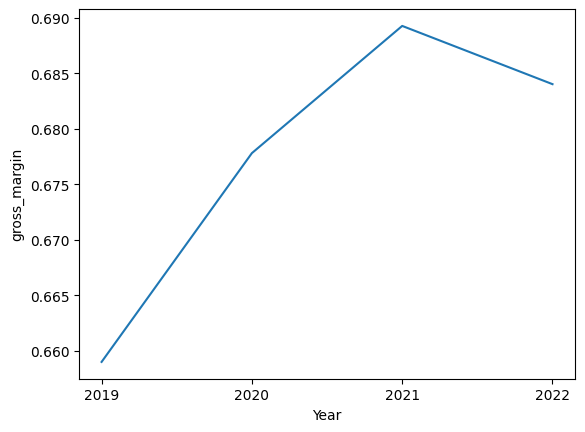

In [47]:
# Compute asset turnover ratio
msft["asset_turnover"] = msft["Total Assets"] / msft["Total Revenue"]

# Compute gross margin ratio
msft["gross_margin"] = (msft["Total Revenue"] - msft["Cost Of Revenue"]) / msft["Total Revenue"]

# Plot the gross margin ratio over time
gross_margin_plot = sns.lineplot(data= msft, x= "Year", y = "gross_margin")
gross_margin_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
plt.close()

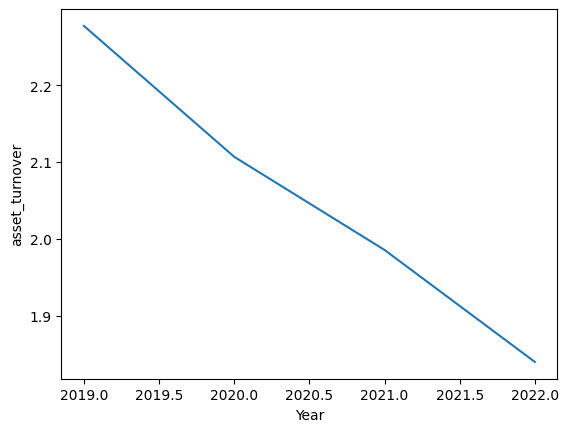

In [48]:
# Plot the asset turnover ratio over time
asset_turnover_plot = sns.lineplot(data= msft, x= "Year", y = "asset_turnover")
gross_margin_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
plt.close()

#### **Plotting ratios in one figure**


In this exercise, you'll plot and compute the gross margin and asset turnover ratio of Microsoft over time. But unlike the last exercise, here you will plot it in one figure. This will help visually analyze the trend of these ratios since the ratios are plotted in the same figure.

You will use the pandas .melt() function in this exercise. In the video, the value_vars argument was specified in the function. value_vars refer to the columns we want to unpivot. However if value_vars is not specified, then all the columns which are not id_vars will be taken as value_vars.

Asset turnover and gross margin ratios have been computed for you in the msft DataFrame, provided in the "asset_turnover" and "gross_margin" columns, respectively.

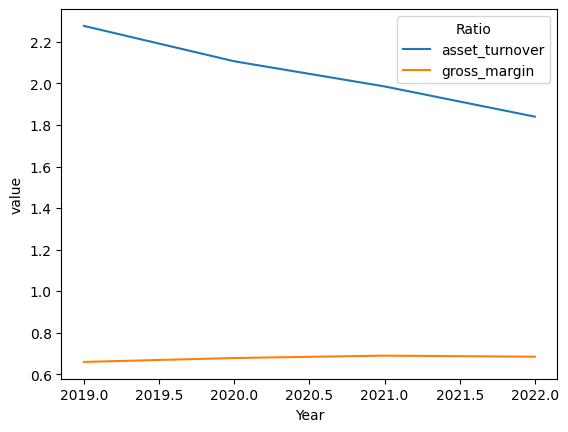

In [49]:
# Convert the DataFrame from wide to long
msft_melt = msft.melt(id_vars="Year", value_vars=["asset_turnover","gross_margin"], var_name="Ratio")

# Plot the data
plot = sns.lineplot(data=msft_melt, x="Year", y="value", hue="Ratio")
plt.show()

plot.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()